In [1]:
from pycigar.utils.input_parser import input_parser
import numpy as np
from pycigar.utils.registry import register_devcon
import tensorflow as tf
from ray.rllib.models.catalog import ModelCatalog
from gym.spaces import Tuple, Discrete, Box

misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/ieee37.dss'
load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/breakpoints.csv'

start = 100
hack = 0.4
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, vectorized_mode=True, percentage_hack=hack)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
del sim_params['attack_randomization']
for node in sim_params['scenario_config']['nodes']:
    node['devices'][0]['adversary_controller'] =  'adaptive_unbalanced_fixed_controller'

from pycigar.envs import CentralControlPhaseSpecificPVInverterEnv
env = CentralControlPhaseSpecificPVInverterEnv(sim_params=sim_params)
env.reset()
done = False
while not done:
    _, r, done, _ = env.step([10, 10, 10])

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from pycigar.utils.output import plot_new
from pycigar.utils.logging import logger
Logger = logger()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


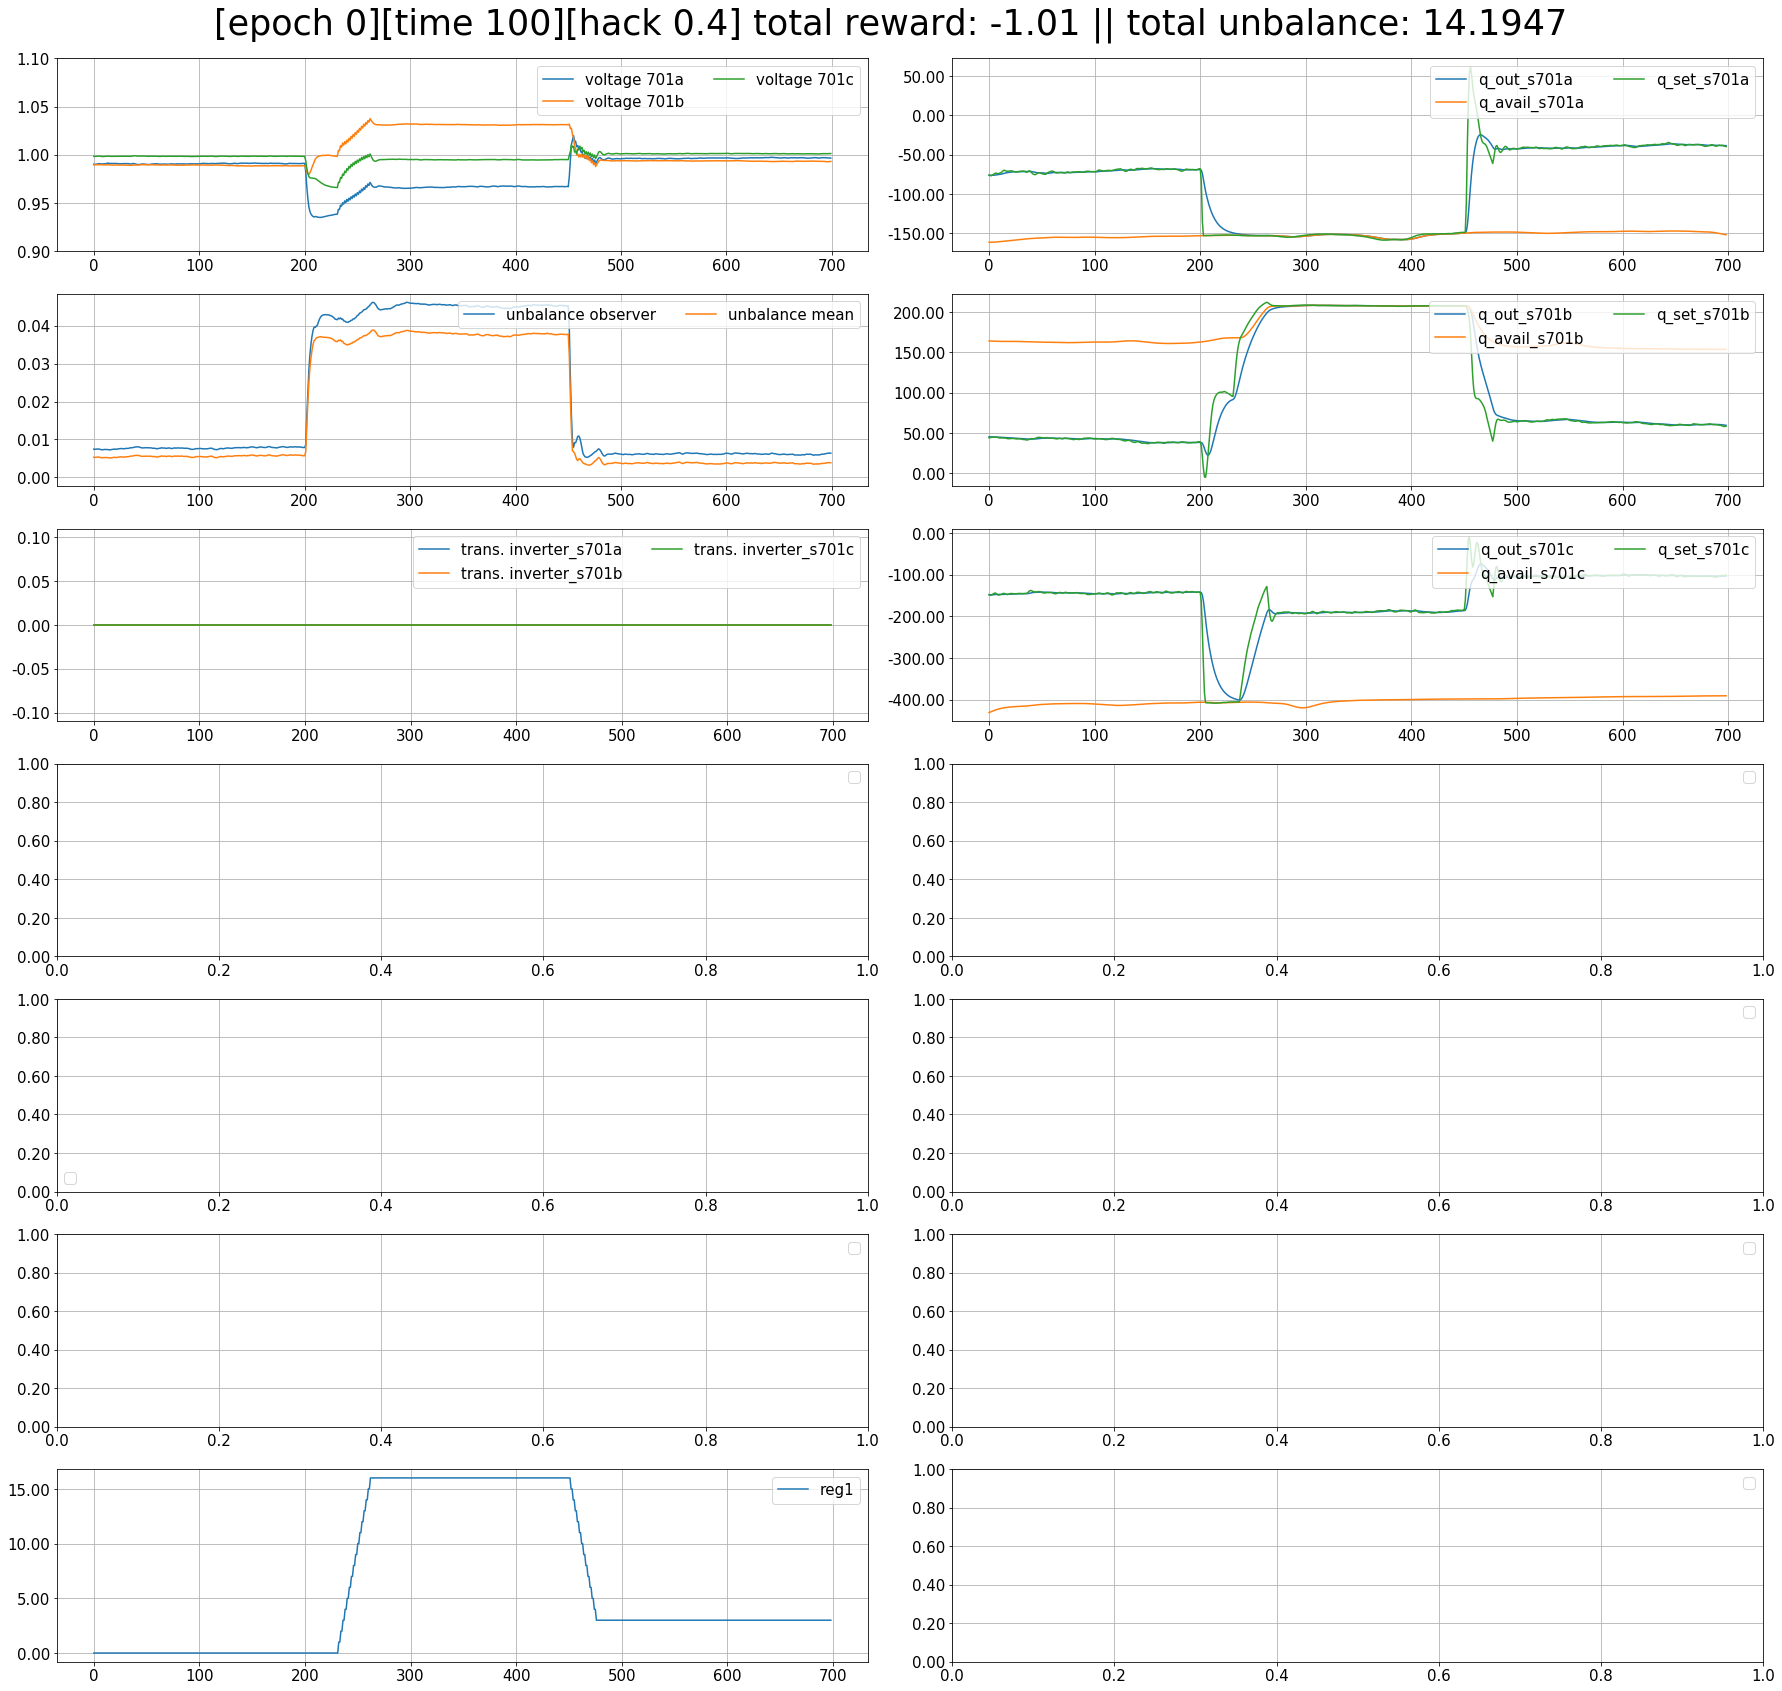

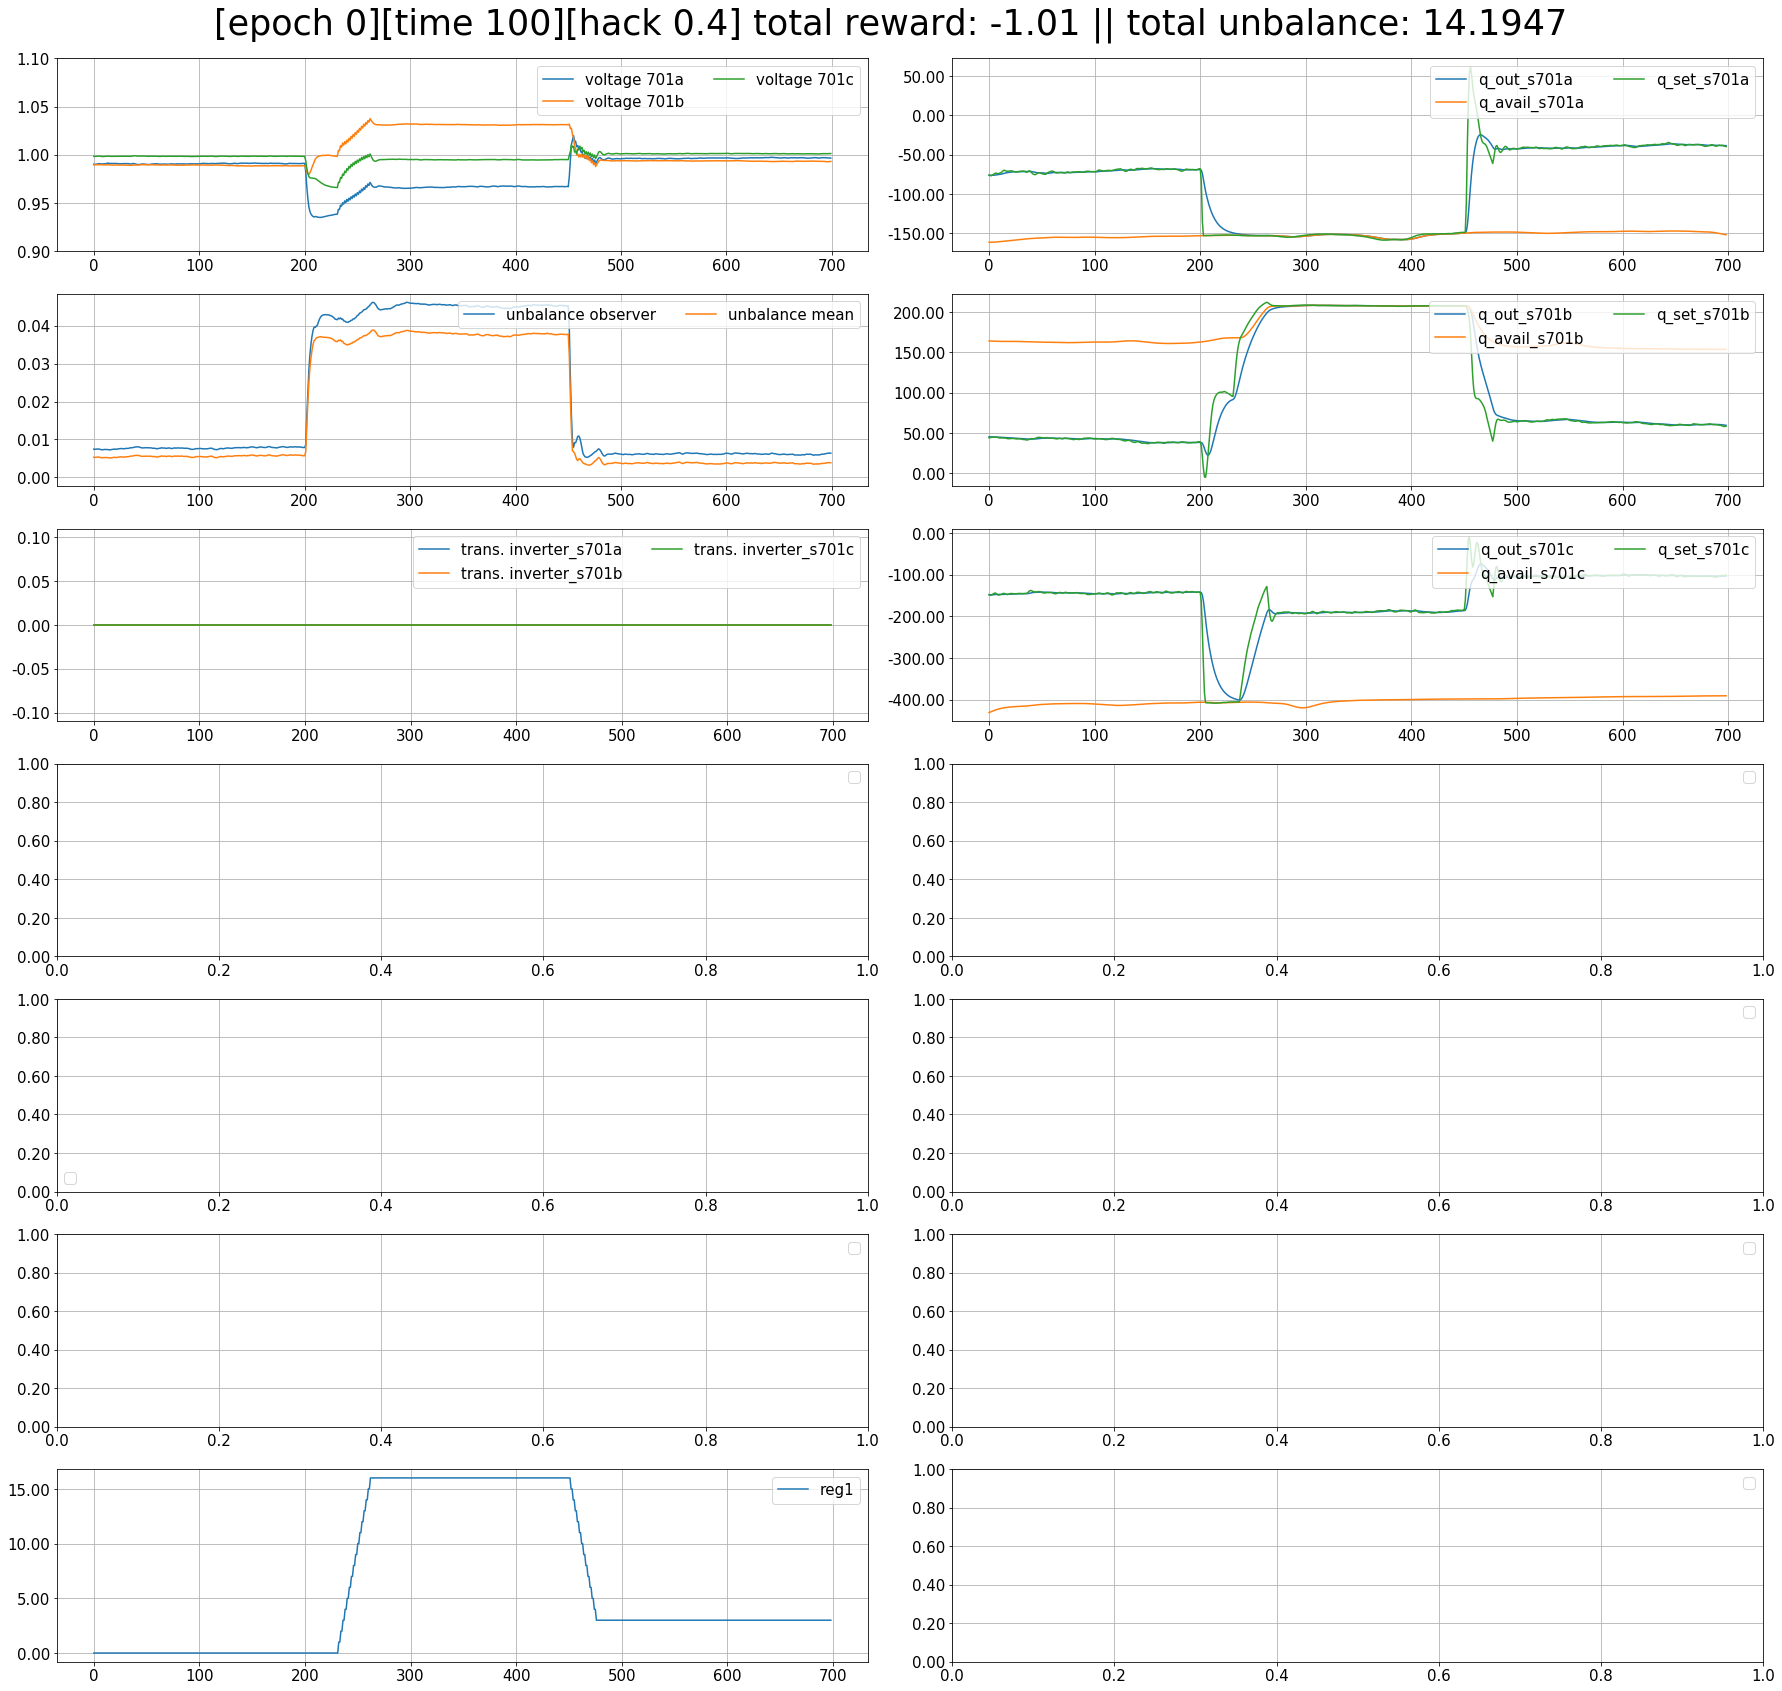

In [3]:
plot_new(Logger.log_dict, Logger.custom_metrics, 0, True)

In [1]:
misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/ieee37.dss'
load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/breakpoints.csv'


misc_inputs_bat = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_battery/misc_inputs.csv'
load_solar_bat = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_battery/load_solar_data.csv'
bat = '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_battery/battery_inputs.txt'

In [2]:
import pandas as pd

solar_load_bat = pd.read_csv(load_solar_bat)
solar_load = pd.read_csv(load_solar)

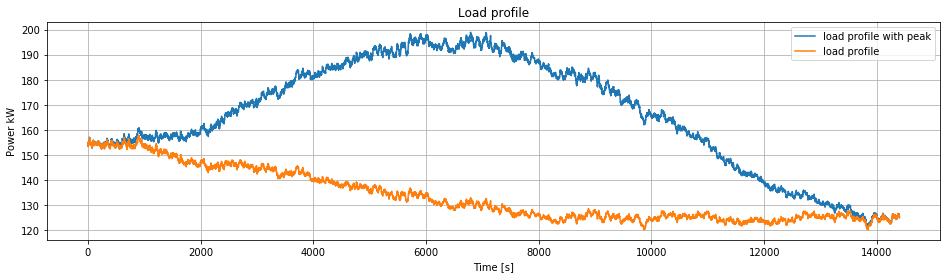

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure(figsize = [16, 4])
plt.plot(np.asarray(solar_load_bat['S701a']),label="load profile with peak")
plt.plot(np.asarray(solar_load['S701a']),label="load profile")
# plt.plot(-np.asarray(Logger.log_dict['network']['substation_power'])[:,1],label="substation reactive power")
# plt.plot((np.asarray(Logger.log_dict['network']['substation_power'])[:,0]**2 + np.asarray(Logger.log_dict['network']['substation_power'])[:,1]**2)**0.5,label="substation apparent power")
plt.grid()
plt.title('Load profile')
plt.xlabel('Time [s]')
plt.ylabel('Power kW')
plt.legend()


In [2]:
from pycigar.utils.input_parser import input_parser
import numpy as np
from pycigar.utils.registry import register_devcon
import tensorflow as tf
from ray.rllib.models.catalog import ModelCatalog
from gym.spaces import Tuple, Discrete, Box

misc_inputs = misc_inputs_bat
dss = dss
load_solar = load_solar_bat
breakpoints = breakpoints
bat = bat

start = 100
hack = 0.4
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, vectorized_mode=True, percentage_hack=hack, battery_path=bat)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]

del sim_params['attack_randomization']
for node in sim_params['scenario_config']['nodes']:
    node['devices'][0]['adversary_controller'] =  'adaptive_unbalanced_fixed_controller'
start = 3601
duration = 14400 - start

sim_params['vectorized_mode'] = True
sim_params['scenario_config']['start_end_time'] = [start, start + duration]
sim_params['scenario_config']['multi_config'] = False
sim_params['scenario_config']['custom_configs']['slack_bus_voltage'] = 1.04 #1.02
#sim_params['scenario_config']['custom_configs']['solar_scaling_factor'] = 1
sim_params['simulation_config']['custom_configs']['solution_control_mode'] = -1 #2

from pycigar.envs import CentralControlPhaseSpecificPVInverterEnv
env = CentralControlPhaseSpecificPVInverterEnv(sim_params=sim_params)
env.reset()
done = False
while not done:
    _, r, done, _ = env.step([10, 10, 10])

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
from pycigar.utils.logging import logger
log_dict = logger().log_dict
custom_metrics = logger().custom_metrics

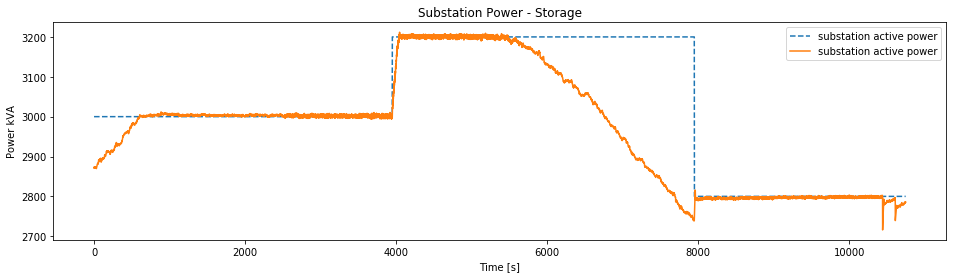

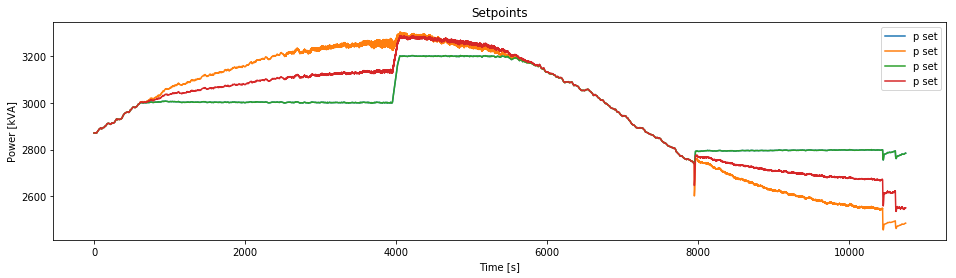

In [5]:
import matplotlib.pyplot as plt
plt.switch_backend('Tkagg')
import numpy as np
%matplotlib inline

fig1 = plt.figure(figsize = [16, 4])
plt.plot(np.asarray(log_dict['psc_cent_701']['p_target']),'--',label="substation active power")
plt.plot(np.asarray(log_dict['network']['substation_power'])[:,0],label="substation active power")
# plt.plot(-np.asarray(Logger.log_dict['network']['substation_power'])[:,1],label="substation reactive power")
# plt.plot((np.asarray(Logger.log_dict['network']['substation_power'])[:,0]**2 + np.asarray(Logger.log_dict['network']['substation_power'])[:,1]**2)**0.5,label="substation apparent power")
plt.title('Substation Power - Storage')
plt.xlabel('Time [s]')
plt.ylabel('Power kVA')
plt.legend()

fig1 = plt.figure(figsize = [16, 4])
plt.plot(log_dict['psc_cent_701']['measured_active_power_lpf'],label="p set")
plt.plot(np.asarray(log_dict['psc_cent_701']['measured_active_power_lpf']) - 3*np.asarray(log_dict['psc_cent_701']['p_set']),label="p set")
plt.plot(log_dict['psc_cent_730']['measured_active_power_lpf'],label="p set")
plt.plot(np.asarray(log_dict['psc_cent_730']['measured_active_power_lpf']) - 3*np.asarray(log_dict['psc_cent_730']['p_set']),label="p set")
plt.title('Setpoints')
plt.xlabel('Time [s]')
plt.ylabel('Power [kVA]')
plt.legend()

plt.show()

plt.plot(log_dict['psc_cent'])

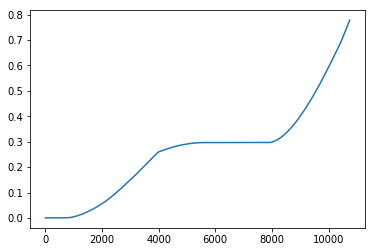

In [10]:
plt.plot(log_dict['bsd_s701a']['bat_cycle'])

/home/toanngo/anaconda3/envs/pycigar-3/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


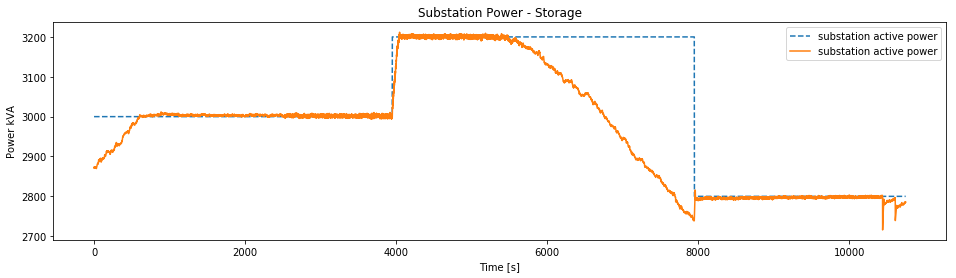

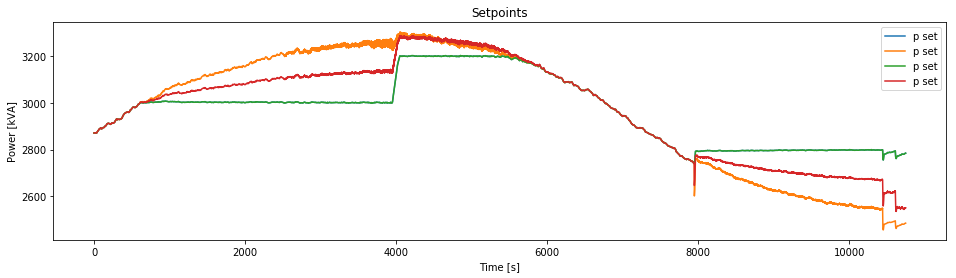

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure(figsize = [16, 4])
plt.plot(np.asarray(log_dict['psc_cent_701']['p_target']),'--',label="substation active power")
plt.plot(np.asarray(log_dict['network']['substation_power'])[:,0],label="substation active power")
# plt.plot(-np.asarray(Logger.log_dict['network']['substation_power'])[:,1],label="substation reactive power")
# plt.plot((np.asarray(Logger.log_dict['network']['substation_power'])[:,0]**2 + np.asarray(Logger.log_dict['network']['substation_power'])[:,1]**2)**0.5,label="substation apparent power")
plt.title('Substation Power - Storage')
plt.xlabel('Time [s]')
plt.ylabel('Power kVA')
plt.legend()

fig1 = plt.figure(figsize = [16, 4])
plt.plot(log_dict['psc_cent_701']['measured_active_power_lpf'],label="p set")
plt.plot(np.asarray(log_dict['psc_cent_701']['measured_active_power_lpf']) - 3*np.asarray(log_dict['psc_cent_701']['p_set']),label="p set")
plt.plot(log_dict['psc_cent_730']['measured_active_power_lpf'],label="p set")
plt.plot(np.asarray(log_dict['psc_cent_730']['measured_active_power_lpf']) - 3*np.asarray(log_dict['psc_cent_730']['p_set']),label="p set")
plt.title('Setpoints')
plt.xlabel('Time [s]')
plt.ylabel('Power [kVA]')
plt.legend()

plt.show()

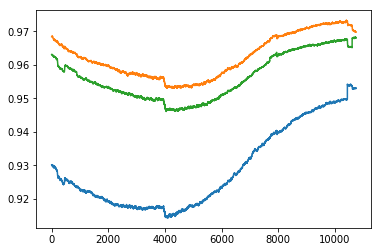

In [7]:
plt.plot(log_dict['s701a']['voltage'])
plt.plot(log_dict['s701b']['voltage'])
plt.plot(log_dict['s701c']['voltage'])

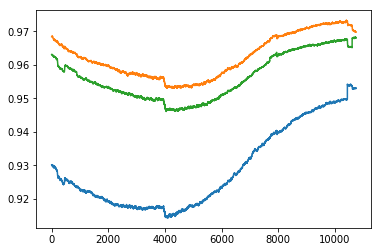

In [8]:
plt.plot(log_dict['s701a']['voltage'])
plt.plot(log_dict['s701b']['voltage'])
plt.plot(log_dict['s701c']['voltage'])

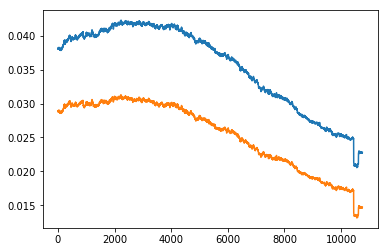

In [9]:
plt.plot(log_dict['u_metrics']['u_worst'])
plt.plot(log_dict['u_metrics']['u_mean'])

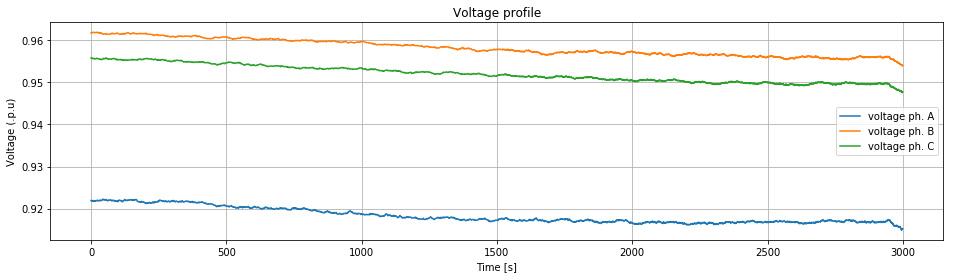

In [20]:
fig1 = plt.figure(figsize = [16, 4])
plt.plot(log_dict['s701a']['voltage'][1000:4000], label='voltage ph. A')
plt.plot(log_dict['s701b']['voltage'][1000:4000], label='voltage ph. B')
plt.plot(log_dict['s701c']['voltage'][1000:4000], label='voltage ph. C')
plt.grid()
plt.title('Voltage profile')
plt.xlabel('Time [s]')
plt.ylabel('Voltage (.p.u)')
plt.legend()

In [9]:
sim_params 

{'M': 2.0,
 'N': 0.1,
 'P': 4.0,
 'Q': 0.5,
 'T': 100,
 'Z': 100,
 'is_disable_log': False,
 'is_disable_y': False,
 'vectorized_mode': True,
 'hack_setting': {'default_control_setting': [1.039,
   1.04,
   1.04,
   1.041,
   1.042]},
 'env_config': {'clip_actions': True, 'sims_per_step': 30},
 'simulation_config': {'network_model_directory': '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/ieee37.dss',
  'custom_configs': {'solution_mode': 1,
   'solution_number': 1,
   'solution_step_size': 1,
   'solution_control_mode': -1,
   'solution_max_control_iterations': 1000000,
   'solution_max_iterations': 30000,
   'power_factor': 0.9}},
 'scenario_config': {'multi_config': False,
  'start_end_time': [3601, 14400],
  'network_data_directory': '/home/toanngo/Documents/GitHub/ceds-cigar/pycigar/data/ieee37busdata_battery/load_solar_data.csv',
  'custom_configs': {'load_scaling_factor': 1.0,
   'solar_scaling_factor': 0.05,
   'slack_bus_v

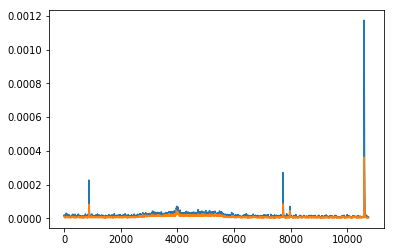

In [17]:
plt.plot(log_dict['y_metrics']['y_worst'])
plt.plot(log_dict['y_metrics']['y_mean'])

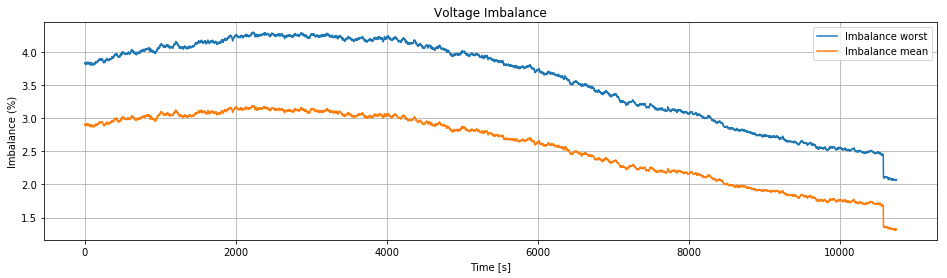

In [7]:
fig1 = plt.figure(figsize = [16, 4])
plt.plot(np.array(log_dict['u_metrics']['u_worst'])*100, label='Imbalance worst')
plt.plot(np.array(log_dict['u_metrics']['u_mean'])*100, label='Imbalance mean')
plt.grid()
plt.title('Voltage Imbalance')
plt.xlabel('Time [s]')
plt.ylabel('Imbalance (%)')
plt.legend()

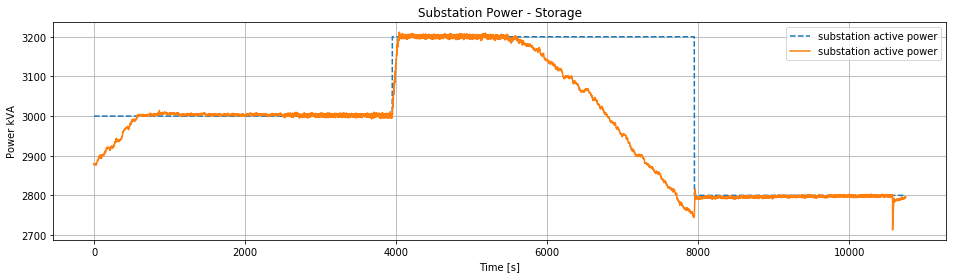

In [8]:
fig1 = plt.figure(figsize = [16, 4])
plt.plot(np.asarray(log_dict['psc_cent_701']['p_target']),'--',label="substation active power")
plt.plot(np.asarray(log_dict['network']['substation_power'])[:,0],label="substation active power")
plt.grid()
plt.title('Substation Power - Storage')
plt.xlabel('Time [s]')
plt.ylabel('Power kVA')
plt.legend()